In [39]:
import numpy as np

from deepquantiles import MixtureDensityRegressor
from deepquantiles.datasets import bishop_s
from deepquantiles.nb_utils import vis_model

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['dark_background'])
mpl.rcParams["font.size"] = 18

MDR = MixtureDensityRegressor

In [30]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from kerashistoryplot.callbacks import PlotHistory

callbacks = [
    ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_delta=0.001, min_lr=0.0001),
    EarlyStopping(monitor='loss', patience=15, min_delta=0.0001),
    PlotHistory(batches=False, n_cols=3, figsize=(15, 7))
]

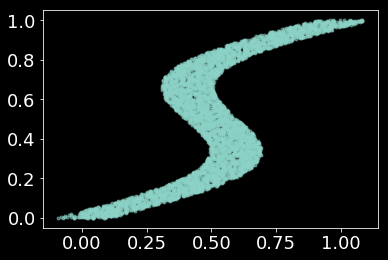

In [31]:
X, y = bishop_s(5000)
plt.plot(X, y, '.', alpha=0.5)

In [95]:
regressor = MixtureDensityRegressor(
    shared_units=(32, 32, 32),
    weight_units=(32, ),
    mu_units=(32, ),
    sigma_units=(32, ),
    lr=0.01,
    batch_size=100,
)

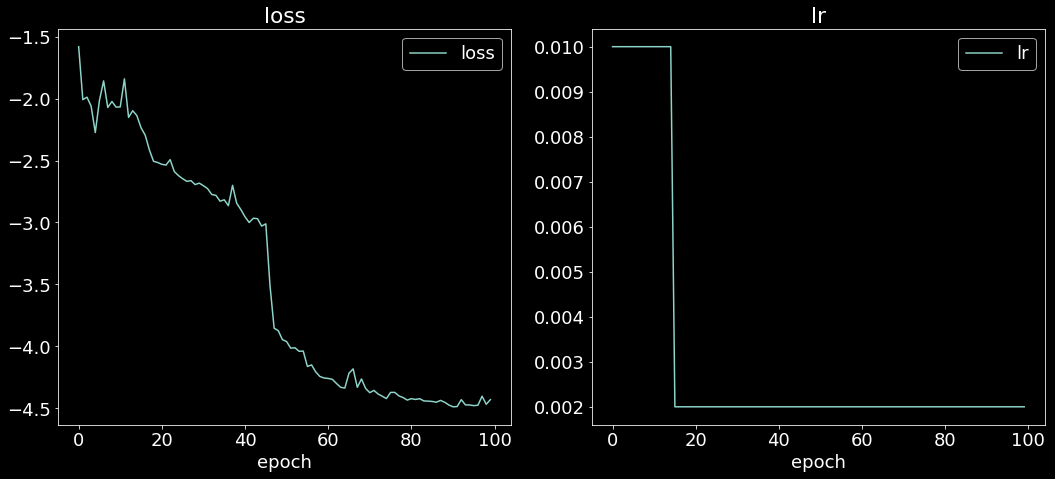

In [96]:
regressor.fit(X, y, epochs=100, callbacks=callbacks, shuffle=True)

In [97]:
regressor.model['loss'].evaluate([X, y], y, verbose=0)

-4.471088053894043

In [98]:
w, mu, sigma = regressor.predict(X)
mean = regressor.predict_mean(X)

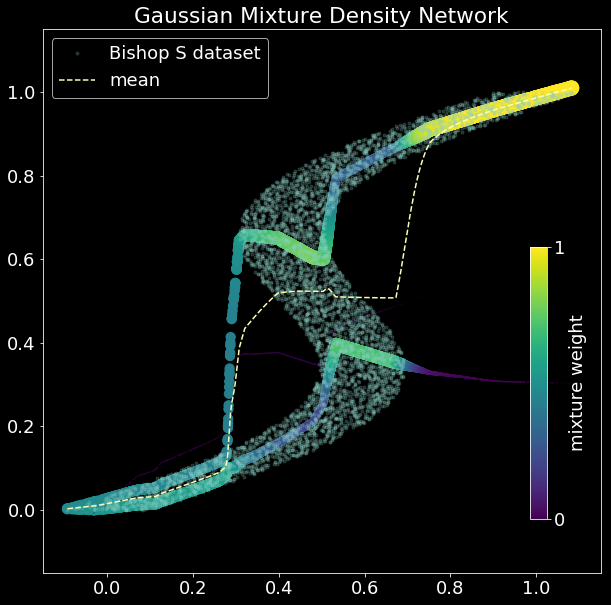

In [99]:
plt.figure(figsize=(10, 10))
plt.plot(X, y, '.', alpha=0.2, label='Bishop S dataset')
plt.plot(X, mean, '--', label='mean')
for i in range(regressor.n_components):
    plt.scatter(X, mu[:, i], c=w[:, i], s=200 * w[:, i], vmin=0, vmax=1)
    # plt.plot(X, mu[:, i] + sigma[:, i], 'w:')
    # plt.plot(X, mu[:, i] - sigma[:, i], 'w:')
plt.xlim([-0.15, 1.15])
plt.ylim([-0.15, 1.15])
plt.legend()
plt.title('Gaussian Mixture Density Network')
cbaxes = inset_axes(plt.gca(), width="3%", height="50%", loc=4, borderpad=3) 
plt.colorbar(cax=cbaxes, ticks=[0.,1], label='mixture weight')
#plt.savefig('mdn2.png')

(0, 1.05)

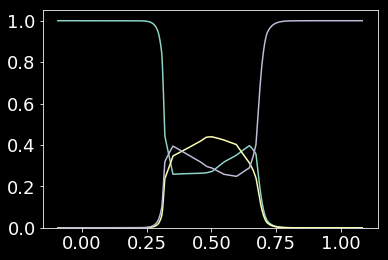

In [84]:
for i in range(regressor.n_components):
    plt.plot(X, w[:, i])
plt.ylim([0, 1.05])

CPU times: user 95 ms, sys: 9.21 ms, total: 104 ms
Wall time: 75.3 ms


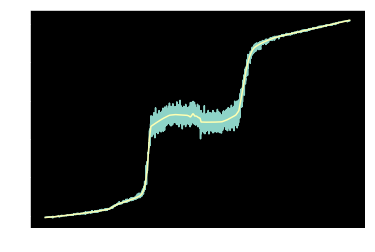

In [27]:
%%time
samples = regressor.sample(X, num_samples=100)

plt.plot(X, samples.mean(axis=1))
plt.plot(X, mean)

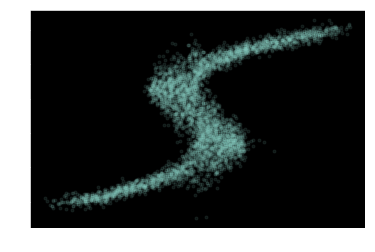

In [28]:
samples = regressor.sample(X, num_samples=1)
sample_X, sample_y = MDR.unroll_samples(X, samples)
plt.plot(sample_X, sample_y, '.', alpha=0.1)